<a href="https://colab.research.google.com/github/cesarniyo/Credit-Card-Fraud-Detection-ANOMALY-DETECTION/blob/master/IntroToClassicalNlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

## 1.1 NLTK Setup

* NLTK is included with the Anaconda Distribution of Python, or can be downloaded directly from nltk.org.
* Once NLTK is installed, the text data files (corpora) should be downloaded. See the following cell to start the download.

In [0]:
import nltk

# uncomment the line below to download NLTK resources the first time NLTK is used and RUN this cell.
# when the "NLTK Downloader" dialog appears (takes 10-20 seconds), click on the "download" button
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

** 1.2 Crash Course in Regular Expressions **

Regular Expression are a great tool for NLP. They can be used interactively, or for rule-based searching and transformations in programs.

If you are new to using regular expressions, or would like a quick refresher, you can study the examples and resulting output in the code cel below.

Here is a cheat sheet for the SEARCH BASICS (code examples follow below):

    Operator   Meaning       Example  Example meaning
    
    +          one or more   a+       look for 1 or more "a" characters
    *          zero or more  a*       look for 0 or more "a" characters
    ?          optional      a?       look for 0 or 1 "a" characters
    []         choose 1      [abc]    look for "a" or "b" or "c"
    [-]        range         [a-z]    look for any character between "a" and "z"
    [^]        not           [^a]     look for character that is not "a"
    ()         grouping      (a-z)+   look for one or more occurences of chars between "a" and "z"
    (|)        or operator   (ey|ax)  look for strings "ey" or "ax"
    
    ab         follow        ab       look for character "a" followed by character "b"
    ^          start         ^a       look for character "a" at start of string/line
    $          end           a$       look for character "a" at end of string/line
    \s         whitespace    \sa      look for whitespace character followed by "a"
    .          any character a.b      look for "a" followed by any char followed by "b"

Common Uses:
    - re.search    finds first matching object
    - re.findall   returns all matching objects
    - re.sub       replaces matches with replacement string

In [0]:
# find all occurences of any character between "a" and "z"
import re

re.findall("[a-z]", "$34.33 cash.")

['c', 'a', 's', 'h']

In [0]:
# find all occurences of either "name:" or "phone:".... word
re.findall("(name|phone):", "My name: Joe, my phone: (312)555-1212")

['name', 'phone']

In [0]:
# find "lion", "lions" or "Lion" or "Lions".............word with conditions
re.findall("([Ll]ion)s?", "Give it to the Lions or the lion.")

['Lion', 'lion']

In [0]:
# replace all lowercase letters with "x".................replacing(substitute given char with x)
re.sub("[a-z]", "x", "Hey, I know this regex stuff...")

'Hxx, I xxxx xxxx xxxxx xxxxx...'

# 2. Text Processing

This section introduces some of the tasks and techniques used to acquire, clean and normalize the text data.

## 2.1 Data Acquisition

Issues:

 * how do I find the data I need?
 * Is it already in digital form, or will it need OCR?
 * how much will it cost?
 * will it be updated/expanded over time? More costs?
 * (if CUSTOMER DATA), do I have the legal / privacy rights needed to use the data in the way I need for my application?
 * do I have the safeguards needed to securely store the data?

In [0]:
import nltk

# shows how to access one of the gutenberg books included in NLTK
print("gutenberg book ids=", nltk.corpus.gutenberg.fileids())

gutenberg book ids= ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [0]:
# load words from "Alice in Wonderland"

alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
print("len(alice)=", len(alice))
print(alice[:100])

len(alice)= 34110
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [0]:
# load words from "Monty Python and the Holy Grail"

grail = nltk.corpus.webtext.words("grail.txt")
print("len(grail)=", len(grail))

print(grail[:100])

len(grail)= 16967
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in']


## 2.2 Plain Text Extraction

If your text data lives in a non-plain text file (WORD, POWERPOINT, PDF, HTML, etc.), you will need to use a "filter" to extract the plain text from the file.

Python has a number of libraries to extract plain text from popular file formats, but they are take searching and supporting code to use.

## 2.3 Word and Sentence Segmentation (Tokenization)

Word Segmentation Issues:

 * Some languages don't white space characters
 * Words with hyphens or apostrophes (Who's at the drive-in?)
 * Numbers, currency, percentages, dates, times (04/01/2018, $55,000.00)
 * Ellipses, special characters
 
Sentences Segmentation Issues:

 * Quoted speech within a sentence
 * Abbreviations with periods (The Ph.D. was D.O.A)
 
Tokenization Techniques

 * Perl script (50 lines) with RegEx (Grefenstette, 1999)
 * maxmatch Algorithm:
 
        themanranafterit  ->   the man ran after it
        thetabledownthere ->   theta bled own there      (Palmer, 2000)

In [0]:
# code example: simple version of maxmatch algorithm for tokenization (word segmentation)
def tokenize(str, dict):
    s = 0
    words = []
    
    while (s < len(str)):
        found = False
        
        # find biggest word in dict that matches str[s:xxx]
        for word in dict:
            lw = len(word)
            if (str[s:s+lw] == word):
                words.append(word)
                s += lw
                found = True
                break
        if (not found):
            words.append(str[s])
            s += 1
    
    print(words)
    #return words

# small dictionary of known words, longest words first
dict = ["before", "table", "theta", "after", "where", "there", "bled", "said", "lead", "man", "her", "own", "the", "ran", "it"]

# this algorighm is designed to work with languages that don't have whitespace characters
# so simulate that in our test
tokenize("themanranafterit", dict)    # works!
tokenize("thetabledownthere", dict)   # fails!

['the', 'man', 'ran', 'after', 'it']
['theta', 'bled', 'own', 'there']


In [0]:
# NLTK example: WORD segmentation

nltk.word_tokenize("the man, he ran after it's $3.23 dog on 03/23/2016.")

['the',
 'man',
 ',',
 'he',
 'ran',
 'after',
 'it',
 "'s",
 '$',
 '3.23',
 'dog',
 'on',
 '03/23/2016',
 '.']

In [0]:
# NLTK example: SENTENCE segmentation

nltk.sent_tokenize("the man ran after it. The table down there? Yes, down there!")

['the man ran after it.', 'The table down there?', 'Yes, down there!']

## 2.4 Stopword Removal

Stopwords are common words that are "not interesting" for the app/task at hand.

Easy part - removing words that appear in list.

Tricky part - what to use for stop words? App-dependent, Standard lists, high-frequency words in your text, ...

In [0]:
# code example: simple algorithm for removing stopwords
stoppers = "a is of the this".split()

def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt

removeStopWords(stoppers, "this is a test of the stop word removal code.")

'test stop word removal code.'

In [0]:
# NLTK example: removing stopwords
from nltk.corpus import stopwords
stops = stopwords.words("English")

print("len(stops)=", len(stops))

removeStopWords(stops, "this is a test of the stop word removal code.")

len(stops)= 179


'test stop word removal code.'

## 2.5 Case Removal

Case removal is part of a larger task called Text Normalization, which includes:

 * case removal
 * stemming (covered in next section)
 
Goal of Case removal - converting all text to, for example, lower case

In [0]:
# code example: case removal
str = 'The man ran after it. The table down there? Yes, down there!'
str.lower()

'the man ran after it. the table down there? yes, down there!'

## 2.6 Stemming

Goal of Stemming: - stripping off endings and other pieces, called AFFIXES - for English, this is prefixes and suffixes.

    - convert word to its base word, called the LEMMA / STEM (e.g., foxes -> fox)
    
Porter Stemmer

 * 100+ cascading "rewrite" rules
 * ational -> ate (e.g., relational -> relate)
 * ing -> (e.g., playing -> play)
 * sess -> ss (e.g., grasses -> grass)

In [0]:
# NLTK example: stemming

def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

str = "Please don't unbuckle your seat-belt while I am driving, he said"

print("porter:", stem_with_porter(str.split()))
print()
print("lancaster:", stem_with_lancaster(str.split()))

porter: ['pleas', "don't", 'unbuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving,', 'he', 'said']

lancaster: ['pleas', "don't", 'unbuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving,', 'he', 'said']


# 3. Text Exploration

## 3.1 Frequency Analysis

 * Frequency Analysis
 * Letter
 * Word
 * Bigrams
 * Plots

In [0]:
# NLTK example: frequence analysis
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

# get raw text from "Sense and Sensibility" by Jane Austen
raw = gutenberg.raw("austen-sense.txt")
fd_letters = FreqDist(raw)

words = gutenberg.words("austen-sense.txt")
fd_words = FreqDist(words)
sas = nltk.Text(words)


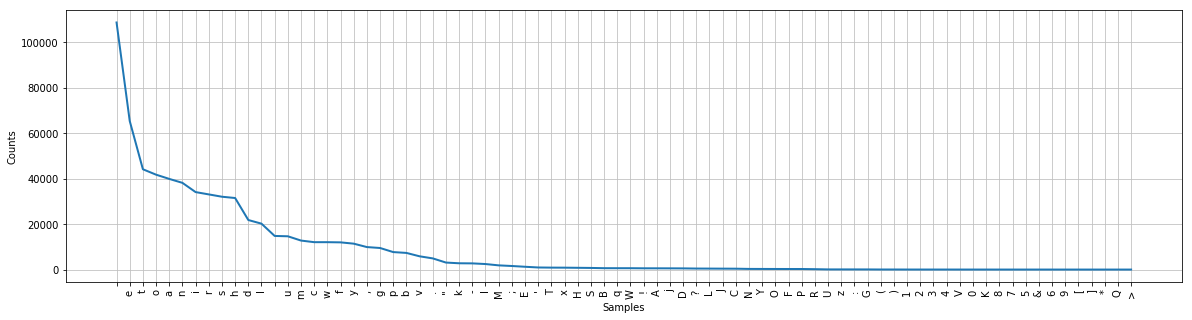

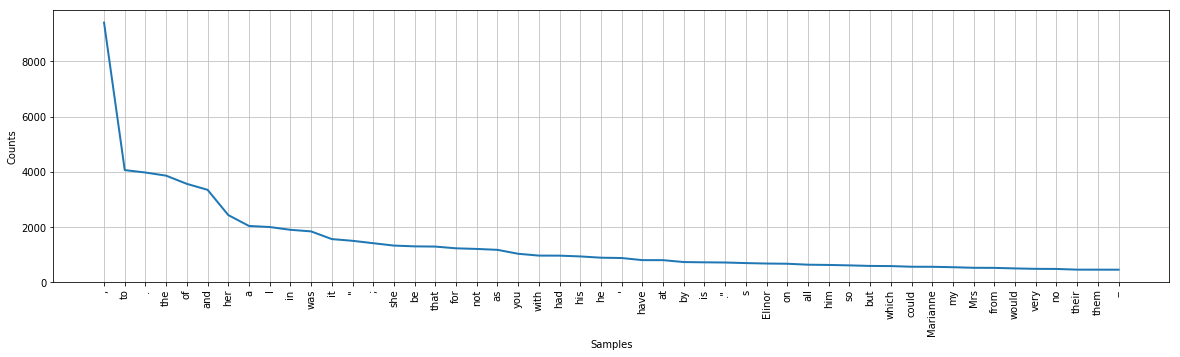

In [0]:

# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
# frequency plot for letters from SAS
fd_letters.plot(100)

# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
# frequency plot for words from SAS
fd_words.plot(50)


## 3.2 Collocations

These are interesting word pairs, usually formed by the most common bigrams. Bigrams are collections of word pairs that occur together in the text.

In [0]:
# Let's look at collocations for our "Sense and Sensibility" text
sas.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


Nice!

Now we are getting a feel for the language and subjects of the text.

** 3.3 Long words **

Sometimes looking at the long words in a text can be revealing. Let's try it on sas.

In [0]:
# Let's look at long wods in the text
longWords = [w for w in set(words) if len(w) > 13]
longWords[:15]

['inconsiderable',
 'thoughtfulness',
 'connoisseurship',
 'unpleasantness',
 'irreproachable',
 'correspondence',
 'unintelligible',
 'dissatisfaction',
 'incautiousness',
 'unexhilarating',
 'insurmountable',
 'disapprobation',
 'accommodations',
 'inconveniences',
 'insignificance']

## 3.3 Concordance Views

Concordance views, also called Keywords in Context (KWIC), show the specified word with the words that surround it in text. These views can be helpful in understanding how the words are being used in the text.

In [0]:
# Let's try looking at some of these recent words in a Concordance view
sas.concordance("affectionately")
print()

sas.concordance("correspondence")
print()

sas.concordance("dare")
print()

Displaying 2 of 2 matches:
 before . She took them all most affectionately by the hand , and expressed grea
bed , took her hand , kissed her affectionately several times , and then gave wa

Displaying 4 of 4 matches:
could not be maintained if their correspondence were to pass through Sir John ' 
ave been Edward ' s gift ; but a correspondence between them by letter , could s
 she had no doubt , and of their correspondence she was not astonished to hear .
ce of Edward afforded her by the correspondence , for his name was not even ment

Displaying 25 of 25 matches:
d not know what he was talking of , I dare say ; ten to one but he was light - h
ll . The assistance he thought of , I dare say , was only such as might be reaso
ng , if I have plenty of money , as I dare say I shall , we may think about buil
 , you will make conquests enough , I dare say , one way or other . Poor Brandon
re . He is the curate of the parish I dare say ." " No , THAT he is not . He is 
em . He was afraid of ca

## 3.4 Other Exploration Task/Views

In [0]:
# look at words similar to a word
sas.similar("affection")

attention time regard mother love heart opinion sister wishes wife
arrival marianne kindness family it marriage sisters sake conduct mind


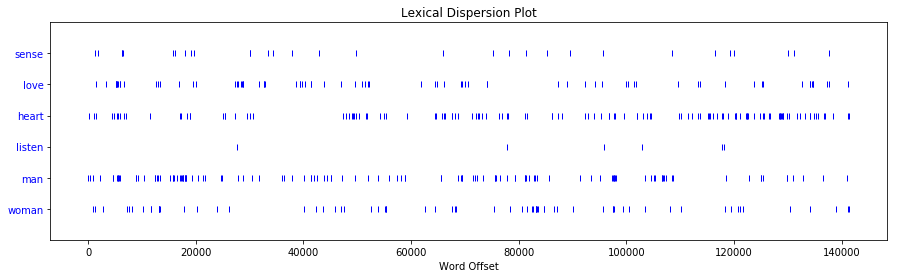

In [0]:
# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))

# look at words as they appear over time in the book/document
sas.dispersion_plot(["sense", "love", "heart", "listen", "man", "woman"])

# 4. Building Features

## 4.1 Bag-of-Words (BOW)

One of the simplest features when dealing with multiple texts (like multiple documents, or multiple sentences within a document), is called Bag-of-Words. It builds a vocabular from each word in the set of texts, and then a feature for each word, indicate the presence/absence of that word within each text. Sometimes, the count of the word is used in place of a presence flag.

A common way to represent a set of features like this is called a One-Hot vector. For example, lets say our vocabular from our set of texts is:

```
  today, here, I, a, fine, sun, moon, bird, saw
```

The sentence we want to build a BOW for is:

```
  I saw a bird today.
```

Using a 1/0 for each word in the vocabulary, our BOW encoded as a one-hot vector would be:

```
  1 0 1 1 0 0 1 1
```


## 4.2 N-Grams

N-grams represent the sequence of N words that are found in a text. They are commonly used as a model of the text language since they represent the frequence of words/phrases appearing in the text.

Common types of N-grams:

 * unigrams - these are the set of single words appearing in the text
 * bigrams - these are the set of word pairs, like "good day" or "big deal", from the text
 * trigrams - these are the set of word triples, like "really good food", from the text
 
To build bigrams for a text, you need to extract all possible word pairs from the text and count how many times each pair occurs. Then, you can use the top N words (1000), or the top percent (50%) as your language model.

## 4.3 Morphological Parsing

** Goal **: convert input word into its morphological parts. For example: "geese" would return goose + N + PL

Morphological Parsing: geese -> goose + N + PL, 
caught -> catch + V + PastPart

Morphological parsing is related to stemming, but instead of mapping the word variants to a stem word, it labels the stem word and its affixes.

Morphological parsing, even for English, is quite involved.

## 4.4 TD/IDF

TD/IDF stands for Term Document Inverse Document Frequency. "Term" here can be thought of as a word. This is a measure of the relative importance of a word within a document, in the context of multiple documents.

We start with the TD part - this is simply a normalized frequency of the word in the document:

 * (word count in document) / (total words in document)
 
The IDF is a weighting of the uniquess of the word across all of the documents. Here is the complete formula of TD/IDF:

* td_idf(t,d) = wc(t,d)/wc(d) / dc(t)/dc()

Where:
* wc(t,d)=# of occurences of term t in doc d
* wc(d)  =# of words in doc d
* dc(t)  =# of docs that contains at least 1 occurence of term t
* dc()   =# of docs in collection

# 5. Classical NLP Applications

## 5.1 Name Gender Classifier

In [0]:
# code to build a classifier to classify names as male or female
# demonstrates the basics of feature extraction and model building
import nltk

names = [(name, 'male') for name in nltk.corpus.names.words("male.txt")]
names += [(name, 'female') for name in nltk.corpus.names.words("female.txt")]

def extract_gender_features(name):
    name = name.lower()
    features = {}
    features["suffix"] = name[-1:]
    features["suffix2"] = name[-2:] if len(name) > 1 else name[0]
    features["suffix3"] = name[-3:] if len(name) > 2 else name[0]
    features["prefix"] = name[:1]
    features["prefix2"] = name[:2] if len(name) > 1 else name[0]
    features["prefix3"] = name[:3] if len(name) > 2 else name[0]
    features["prefix4"] = name[:4] if len(name) > 3 else name[0]
    features["prefix5"] = name[:5] if len(name) > 4 else name[0]
    #features["wordLen"] = len(name)

    #for letter in "abcdefghijklmnopqrstuvwxyz":
    #    features[letter + "-count"] = name.count(letter)
    
    return features

data = [(extract_gender_features(name), gender) for (name, gender) in names]

import random
random.shuffle(data)

#print(data[:10])
#print()
#print(data[-10:])

dataCount = len(data)
trainCount = int(.8*dataCount)#80%

trainData = data[:trainCount]
testData = data[trainCount:]
bayes = nltk.NaiveBayesClassifier.train(trainData)

def classify(name):
    label = bayes.classify(extract_gender_features(name))
    print("name=", name, "classified as=", label)
    
print("trainData accuracy=", nltk.classify.accuracy(bayes, trainData))
print("testData accuracy=", nltk.classify.accuracy(bayes, testData))

classify("david")
classify("susan")
classify("alex")

bayes.show_most_informative_features(25)

[({'suffix': 'y', 'suffix2': 'ny', 'suffix3': 'nny', 'prefix': 'l', 'prefix2': 'la', 'prefix3': 'lan', 'prefix4': 'lann', 'prefix5': 'lanny'}, 'male'), ({'suffix': 't', 'suffix2': 'et', 'suffix3': 'het', 'prefix': 'c', 'prefix2': 'ch', 'prefix3': 'che', 'prefix4': 'chet', 'prefix5': 'c'}, 'male'), ({'suffix': 'y', 'suffix2': 'by', 'suffix3': 'oby', 'prefix': 'r', 'prefix2': 'ro', 'prefix3': 'rob', 'prefix4': 'roby', 'prefix5': 'r'}, 'female'), ({'suffix': 'e', 'suffix2': 'le', 'suffix3': 'lle', 'prefix': 'g', 'prefix2': 'ga', 'prefix3': 'gab', 'prefix4': 'gabr', 'prefix5': 'gabri'}, 'female'), ({'suffix': 'l', 'suffix2': 'il', 'suffix3': 'hil', 'prefix': 'p', 'prefix2': 'ph', 'prefix3': 'phi', 'prefix4': 'phil', 'prefix5': 'p'}, 'female'), ({'suffix': 'n', 'suffix2': 'wn', 'suffix3': 'awn', 'prefix': 'd', 'prefix2': 'da', 'prefix3': 'daw', 'prefix4': 'dawn', 'prefix5': 'd'}, 'female'), ({'suffix': 'a', 'suffix2': 'ia', 'suffix3': 'dia', 'prefix': 'c', 'prefix2': 'co', 'prefix3': 'con',

In [0]:
# print gender classifier errors so we can design new features to identify the cases
errors = []

for (name,label) in names:
    if bayes.classify(extract_gender_features(name)) != label:
        errors.append({"name": name, "label": label})
        
errors

[{'name': 'Abbey', 'label': 'male'},
 {'name': 'Abbie', 'label': 'male'},
 {'name': 'Addie', 'label': 'male'},
 {'name': 'Aditya', 'label': 'male'},
 {'name': 'Ali', 'label': 'male'},
 {'name': 'Alix', 'label': 'male'},
 {'name': 'Allie', 'label': 'male'},
 {'name': 'Allyn', 'label': 'male'},
 {'name': 'Andie', 'label': 'male'},
 {'name': 'Andrea', 'label': 'male'},
 {'name': 'Andri', 'label': 'male'},
 {'name': 'Andy', 'label': 'male'},
 {'name': 'Angie', 'label': 'male'},
 {'name': 'Antoine', 'label': 'male'},
 {'name': 'Antone', 'label': 'male'},
 {'name': 'Antoni', 'label': 'male'},
 {'name': 'Ari', 'label': 'male'},
 {'name': 'Arie', 'label': 'male'},
 {'name': 'Ashley', 'label': 'male'},
 {'name': 'Augustine', 'label': 'male'},
 {'name': 'Avi', 'label': 'male'},
 {'name': 'Bealle', 'label': 'male'},
 {'name': 'Bela', 'label': 'male'},
 {'name': 'Bennie', 'label': 'male'},
 {'name': 'Bernie', 'label': 'male'},
 {'name': 'Bertie', 'label': 'male'},
 {'name': 'Billie', 'label': 'mal

## 5.2 Sentiment Analysis

In [0]:
# sentiment analysis - part #1
from nltk.corpus import movie_reviews as reviews
import random

docs = [(list(reviews.words(id)), cat) for cat in reviews.categories() for id in reviews.fileids(cat)]
random.shuffle(docs)

#print([ (len(d[0]), d[0][:2], d[1]) for d in docs[:10]])

fd = nltk.FreqDist(word.lower() for word in reviews.words())
topKeys = [ key for (key,value) in fd.most_common(2000)]

In [0]:
# sentiment analysis - part #2
import nltk

def review_features(doc):
    docSet = set(doc)
    features = {}
    
    for word in topKeys:
        features[word] = (word in docSet)
    
    return features

#review_features(reviews.words("pos/cv957_8737.txt"))

data = [(review_features(doc), label) for (doc,label) in docs]

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes2 = nltk.NaiveBayesClassifier.train(trainData)

print("train accuracy=", nltk.classify.accuracy(bayes2, trainData))
print("test accuracy=", nltk.classify.accuracy(bayes2, testData))

bayes2.show_most_informative_features(20)

train accuracy= 0.87875
test accuracy= 0.8275
Most Informative Features
                  seagal = True              neg : pos    =     10.4 : 1.0
             wonderfully = True              pos : neg    =      9.1 : 1.0
             outstanding = True              pos : neg    =      8.7 : 1.0
                   mulan = True              pos : neg    =      6.9 : 1.0
                  poorly = True              neg : pos    =      6.6 : 1.0
                    lame = True              neg : pos    =      6.5 : 1.0
                   awful = True              neg : pos    =      6.2 : 1.0
                   damon = True              pos : neg    =      6.1 : 1.0
                  wasted = True              neg : pos    =      5.4 : 1.0
              ridiculous = True              neg : pos    =      5.3 : 1.0
                   bland = True              neg : pos    =      5.0 : 1.0
                    dull = True              neg : pos    =      4.8 : 1.0
                     era = T